## Simple exercise on Bayesian inference

Consider the following simple problem:

*We perform a number of experiments of biased coin tosses. During the $i$-th experiment, the coin is tossed $N_i$ times. At each toss, the coin comes up a head with probability $p$, and a tail with probability $1-p$, independently of prior tosses. Let $X_i$ be the number of heads in the $N_i$-toss sequence. We want to estimate the biased $p$ after each experiment (which consists of $N_i$ tosses).*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

def plot_functions(p, prior, likelihood, posterior, plotname="graph"):
    # This function takes as arguments the values of the prior,
    # likelihood and posterior and plots them
    # x is the grid
    plt.figure(figsize=(8,5))
    # plotname is an extra parameter which can be used to modify the name of the plot
    # as well as the name of the saved file.
    plt.title(f"{plotname}")
    plt.plot(p, likelihood, color='black', label='Likelihood')
    plt.plot(p, prior, linestyle='dashed', color='blue', label='Prior Distribution')
    plt.plot(p, posterior, linestyle='dashed', color='red', label='Posterior Distribution')
    plt.legend(loc="best")
    #plt.savefig(f"{plotname}.pdf", bbox_inches="tight") # <- Uncomment this line to save the graph
    plt.show()

def solution(prior_params,Ns,Xs,which_experiment):
    """
    Arguments
        prior_params (tuple): a tuple (a,b) holding the parameters
            of the prior Beta pdf B(p;a,b)
        Ns (list): this is a list [N1,N2,...,Nk] holding the number of tosses, Ni, per experiment
        Xs (list): this is a list [x1,x2,...,xk] holding the number of heads, xi, per experiment
        which_experiment (int): this is an integer that instructs when to plot the three graphs.
            For example, if which_experiment = 1, then we receive the plot of the three graphs after
            the second experiment, i.e. for x2,N2. Remember! Indexing in Python starts from 0.
    """
    a, b = prior_params # unpack the two parameters
    num_experiments = len(Xs) # how many experiments were performed / equivalently len(Ns)
    numSteps = 200 # how many grid points
    p = np.linspace(0,1,numSteps) # this is only to be able to draw functions, i.e. create a grid
    xi, Ni = Xs[which_experiment], Ns[which_experiment] # Remember, however, that indices start from 0
    likelihood = binom.pmf(xi, Ni, p) # The likelihood function
    likelihood = likelihood/likelihood.sum()*numSteps
    prior = beta.pdf(p, a + sum(Xs[0:which_experiment]), b - sum(Xs[0:which_experiment]) + sum(Ns[0:which_experiment]))
    posterior = beta.pdf(p, a + sum(Xs[0:which_experiment+1]), b - sum(Xs[0:which_experiment+1]) + sum(Ns[0:which_experiment+1]))
    plotname = f"Distributions plot for a = {a} and b = {b}"
    plot_functions(p, prior, likelihood, posterior, plotname) # plot the required graph

## Examples

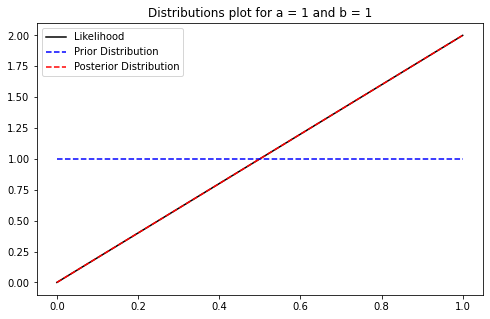

In [2]:
# In this example we only perform one experiment with a total of 1 toss which is heads
prior_params = (1,1)
Ns = [1]
Xs = [1]
which_experiment = 0

solution(prior_params,Ns,Xs,which_experiment)

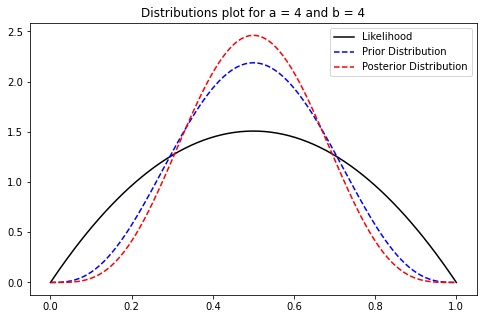

In [3]:
# In this example we only perform one experiment with a total of
# 2 tosses, 1 of which is heads
prior_params = (4,4)
Ns = [2]
Xs = [1]
which_experiment = 0

solution(prior_params,Ns,Xs,which_experiment)

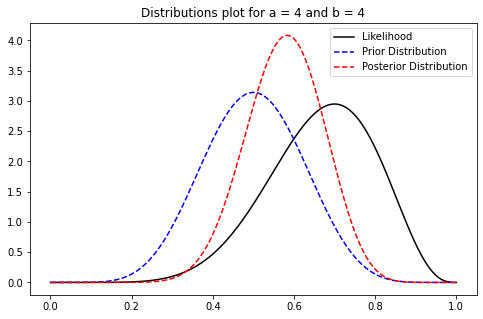

In [4]:
# This example consists of three experiments with N1, N2, N3 tosses,
# which result to x1, x2, x3 heads, respectively.
prior_params = (4,4)
Ns = [3, 5, 10]
Xs = [2, 2, 7]
which_experiment = 2 # show final results, not intermediate

solution(prior_params,Ns,Xs,which_experiment)

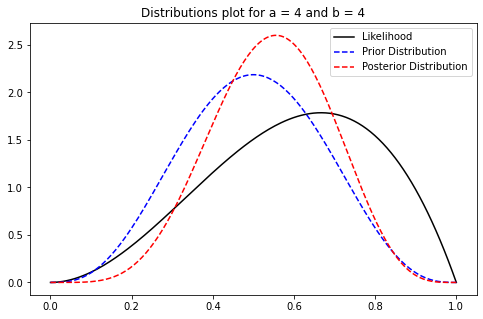

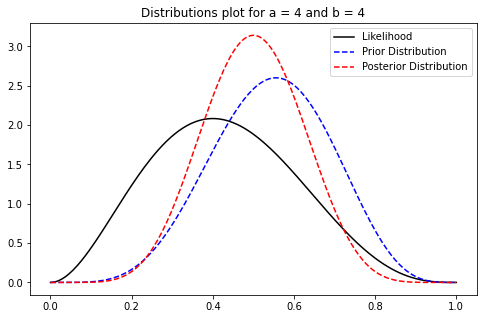

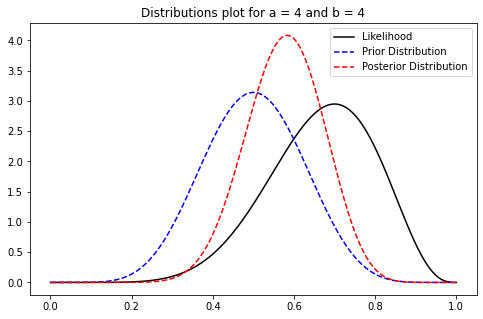

In [5]:
# Finally, what if we wanted to depict the graphs after each experiment in the previous case?
# Instead of simply setting which_experiment = 2, we wrap the function in a for loop, which loops
# over the values 0, 1, 2, in order to show us the results after each consecutive experiment

# Why do this? This allows us to check how our observations on the data influence the posterior
# incrementally
prior_params = (4,4)
Ns = [3, 5, 10]
Xs = [2, 2, 7]

for i in range(3):
    which_experiment = i
    solution(prior_params,Ns,Xs,which_experiment)